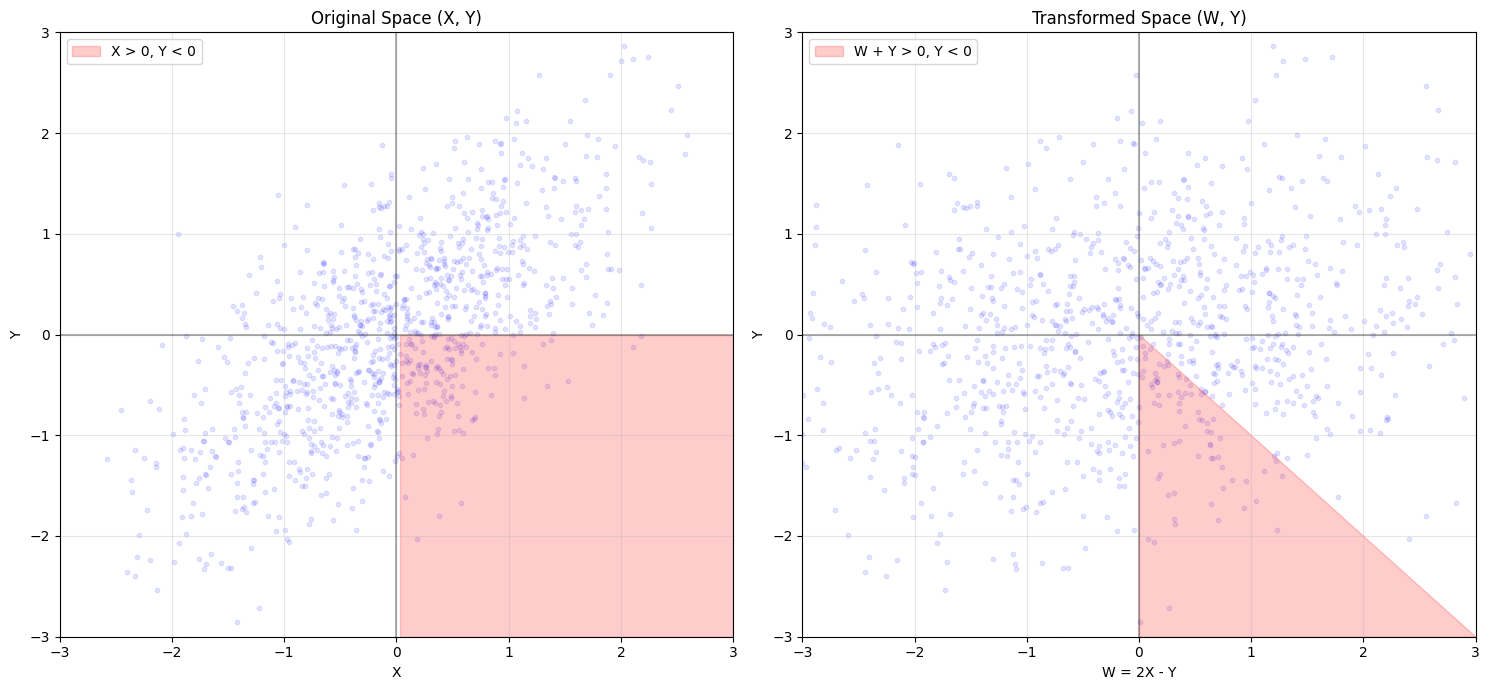

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap

# Set random seed for reproducibility
np.random.seed(42)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Parameters for the plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Generate bivariate normal samples for visualization
n_samples = 1000
cov_matrix = np.array([[1, 1/np.sqrt(2)], [1/np.sqrt(2), 1]])
samples = np.random.multivariate_normal([0, 0], cov_matrix, n_samples)

# First subplot: Original space (X, Y)
ax1.set_title('Original Space (X, Y)', fontsize=12)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plot the samples
ax1.scatter(samples[:, 0], samples[:, 1], alpha=0.1, color='blue', s=10)

# Highlight the region X > 0, Y < 0
region_mask = (X > 0) & (Y < 0)
ax1.fill_between(x[x > 0], 0, -3, alpha=0.2, color='red', label='X > 0, Y < 0')

# Add grid and legend
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Second subplot: Transformed space (W, Y)
ax2.set_title('Transformed Space (W, Y)', fontsize=12)
ax2.set_xlabel('W = 2X - Y')
ax2.set_ylabel('Y')

# Calculate W for the samples
w_samples = 2 * samples[:, 0] - samples[:, 1]

# Plot the samples in transformed space
ax2.scatter(w_samples, samples[:, 1], alpha=0.1, color='blue', s=10)

# Create grid for transformed space
W = 2 * X - Y

# Plot the transformed region W + Y > 0, Y < 0
y_plot = np.linspace(-3, 0, 100)
w_plot = -y_plot
ax2.fill_between(w_plot, y_plot, -3, alpha=0.2, color='red', 
                 label='W + Y > 0, Y < 0')

# Add grid and legend
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Set the visual style

sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# Create figure with two subplots with a specific aspect ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Geometric Interpretation of Conditional Probability\nthrough Variable Transformation', 
             fontsize=14, y=1.02)

# Parameters for the plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Generate bivariate normal samples
n_samples = 2000  # Increased number of samples
cov_matrix = np.array([[1, 1/np.sqrt(2)], [1/np.sqrt(2), 1]])
samples = np.random.multivariate_normal([0, 0], cov_matrix, n_samples)

# Custom color scheme
sample_color = '#3498db'  # Blue
region_color = '#e74c3c'  # Red
grid_color = '#95a5a6'    # Gray

# First subplot: Original space (X, Y)
ax1.set_title('Original Space (X, Y)\nRegion: X > 0, Y < 0', fontsize=12, pad=20)
ax1.set_xlabel('X', fontsize=10)
ax1.set_ylabel('Y', fontsize=10)

# Create density plot
sns.kdeplot(data=samples, x=samples[:,0], y=samples[:,1], 
            levels=5, color=sample_color, alpha=0.5, ax=ax1)

# Plot the samples with enhanced aesthetics
ax1.scatter(samples[:, 0], samples[:, 1], alpha=0.2, 
            color=sample_color, s=15, label='Samples')

# Highlight the region X > 0, Y < 0
ax1.fill_between(x[x > 0], 0, -3, alpha=0.2, 
                 color=region_color, label='Target Region')

# Add grid and legend with enhanced styling
ax1.grid(True, alpha=0.2, color=grid_color, linestyle='--')
ax1.legend(frameon=True, fancybox=True, shadow=True)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)

# Add axes with custom styling
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=1.5)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=1.5)

# Second subplot: Transformed space (W, Y)
ax2.set_title('Transformed Space (W, Y)\nRegion: W + Y > 0, Y < 0', fontsize=12, pad=20)
ax2.set_xlabel('W = 2X - Y', fontsize=10)
ax2.set_ylabel('Y', fontsize=10)

# Calculate W for the samples
w_samples = 2 * samples[:, 0] - samples[:, 1]

# Create density plot in transformed space
sns.kdeplot(data=samples, x=w_samples, y=samples[:,1], 
            levels=5, color=sample_color, alpha=0.5, ax=ax2)

# Plot the samples in transformed space
ax2.scatter(w_samples, samples[:, 1], alpha=0.2, 
            color=sample_color, s=15, label='Samples')

# Plot the transformed region with enhanced styling
y_plot = np.linspace(-3, 0, 100)
w_plot = -y_plot
ax2.fill_between(w_plot, y_plot, -3, alpha=0.2, 
                 color=region_color, label='Target Region')

# Add grid and legend with enhanced styling
ax2.grid(True, alpha=0.2, color=grid_color, linestyle='--')
ax2.legend(frameon=True, fancybox=True, shadow=True)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

# Add axes with custom styling
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=1.5)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=1.5)

# Add text annotations explaining the probability
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax1.text(2, -2, 'P(X > 0, Y < 0) = 1/8\nP(Y < 0) = 1/2', 
         fontsize=10, bbox=props)
ax2.text(1.5, -2, 'P(X > 0 | Y < 0) = 1/4', 
         fontsize=10, bbox=props)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)